In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torchvision.datasets.mnist import MNIST
from torch.autograd import Variable
from torch.utils.data import DataLoader

import vae

using devide: cpu


Auto-Encoding Variational Bayes https://arxiv.org/abs/1312.6114
Tutorial on Variational Autoencoders https://arxiv.org/abs/1606.05908
https://towardsdatascience.com/intuitively-understanding-variational-autoencoders-1bfe67eb5daf

In [2]:
mnist_dataset_train = MNIST('./tmp/', train=True, download=True,
                            transform=vae.preprocess)

In [3]:
train_data = DataLoader(mnist_dataset_train, batch_size=16, shuffle=True)

In [4]:
len(mnist_dataset_train)

60000

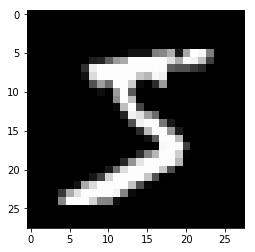

In [5]:
plt.imshow(mnist_dataset_train[0][0].numpy()[0], cmap='gray')

In [6]:
model = vae.train()

epoch: 0 loss: 204.81533813476562
epoch: 1 loss: 164.55426025390625
epoch: 2 loss: 158.17816162109375
epoch: 3 loss: 155.33811950683594
epoch: 4 loss: 153.48068237304688
epoch: 5 loss: 152.23226928710938
epoch: 6 loss: 150.9008331298828
epoch: 7 loss: 149.8129119873047
epoch: 8 loss: 148.79942321777344
epoch: 9 loss: 147.4121551513672
epoch: 10 loss: 146.3401641845703
epoch: 11 loss: 145.6037139892578
epoch: 12 loss: 144.82717895507812
epoch: 13 loss: 144.60621643066406
epoch: 14 loss: 143.58717346191406
epoch: 15 loss: 143.1021270751953
epoch: 16 loss: 142.76718139648438
epoch: 17 loss: 143.5013427734375
epoch: 18 loss: 142.54676818847656
epoch: 19 loss: 141.525390625
epoch: 20 loss: 140.807373046875
epoch: 21 loss: 140.62950134277344
epoch: 22 loss: 139.83680725097656
epoch: 23 loss: 139.5204315185547
epoch: 24 loss: 139.33335876464844
epoch: 25 loss: 138.97015380859375
epoch: 26 loss: 138.7536163330078
epoch: 27 loss: 138.68922424316406
epoch: 28 loss: 138.4551239013672
epoch: 29 lo

In [6]:
#torch.save(model, 'vae.pth')
model = torch.load('vae.pth') 

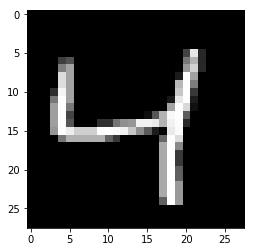

In [7]:
plt.imshow(mnist_dataset_train[2][0].numpy()[0], cmap='gray')

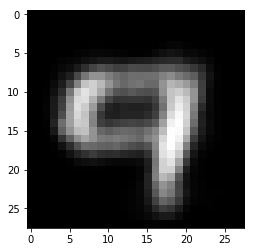

In [8]:
img, _, _ = model(Variable(mnist_dataset_train[2][0]))
img = img.data
plt.imshow(vae.to_img(img)[0], cmap='gray')

In [9]:
latents = vae.collect_latents(model)
latents.head(3)

,t,vx,vy,x,y
0,5,-3.379459,-2.950280,0.058049,-1.330872
1,0,-3.446320,-3.322766,1.798387,0.634079
2,4,-4.438442,-4.450891,-0.197971,-0.010424


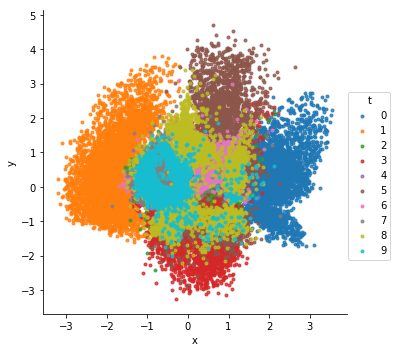

In [10]:
sns.lmplot('x', 'y', latents, hue='t', fit_reg=False, markers='.')

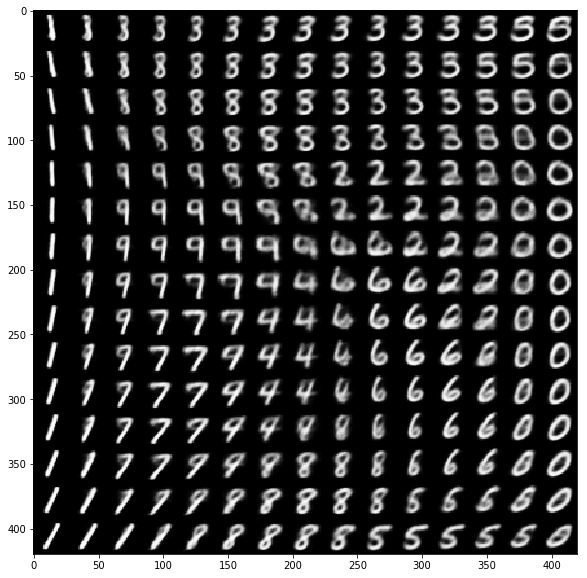

In [12]:
vae.plot_digits(model)